Name : Pranav Tiwari

Roll no : 201127

# CNN Implementation

## Traffic Signal Recognition

Aim:- To classify traffic signals images using CNN architecture

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


Dataset used:- GTSRB - German Traffic Sign Recognition Benchmark

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?resource=download

In [2]:
# Dataset Structure
# Train---0\ contain images of class 0
#       --1\ contain images of class 1
#       --2\ contain images of class 2
data = []
labels = []
classes = 43
for i in range(classes):
    path = os.path.join('D:\Dataset\GTSRB - German Traffic Sign Recognition Benchmark','Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image) 
            labels.append(i)
        except:
            print("Error loading image")


### Train-Dev Split

In [3]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print("Tolat Size   : ", data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_dev, y_train, y_dev = train_test_split(data, labels, test_size=0.2, random_state=42)
print("X Train size : ",X_train.shape)
print("y Train size : ",y_train.shape)
print("X Test size  : ",X_dev.shape)
print("y Test size  : ",y_dev.shape)


Tolat Size   :  (39209, 30, 30, 3) (39209,)
X Train size :  (31367, 30, 30, 3)
y Train size :  (31367,)
X Test size  :  (7842, 30, 30, 3)
y Test size  :  (7842,)


In [4]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_dev = to_categorical(y_dev, 43)

In [5]:
print("y_train\n",y_train)
print("y_test\n",y_dev)

y_train
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### CNN Architecture 

In [6]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

### Model Training

In [8]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_dev, y_dev))


Epoch 1/15
981/981 [==============================] - 36s 36ms/step - loss: 1.7876 - accuracy: 0.5434 - val_loss: 0.3431 - val_accuracy: 0.9346
Epoch 2/15
981/981 [==============================] - 36s 37ms/step - loss: 0.4672 - accuracy: 0.8711 - val_loss: 0.1111 - val_accuracy: 0.9699
Epoch 3/15
981/981 [==============================] - 36s 37ms/step - loss: 0.3150 - accuracy: 0.9100 - val_loss: 0.1655 - val_accuracy: 0.9584
Epoch 4/15
981/981 [==============================] - 36s 37ms/step - loss: 0.3046 - accuracy: 0.9174 - val_loss: 0.1608 - val_accuracy: 0.9621
Epoch 5/15
981/981 [==============================] - 36s 36ms/step - loss: 0.2256 - accuracy: 0.9380 - val_loss: 0.0662 - val_accuracy: 0.9824
Epoch 6/15
981/981 [==============================] - 35s 36ms/step - loss: 0.2162 - accuracy: 0.9416 - val_loss: 0.0585 - val_accuracy: 0.9828
Epoch 7/15
981/981 [==============================] - 38s 38ms/step - loss: 0.2162 - accuracy: 0.9429 - val_loss: 0.0512 - val_accuracy:

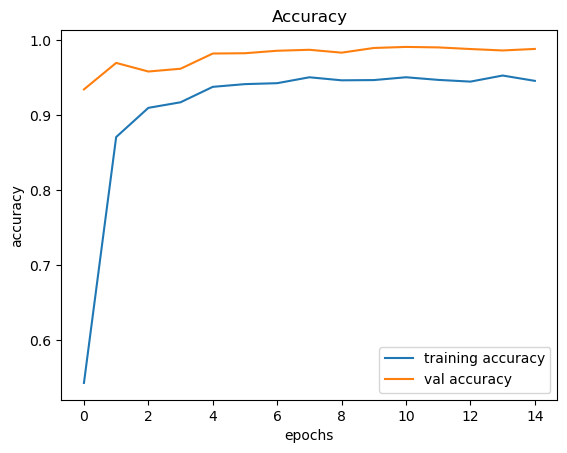

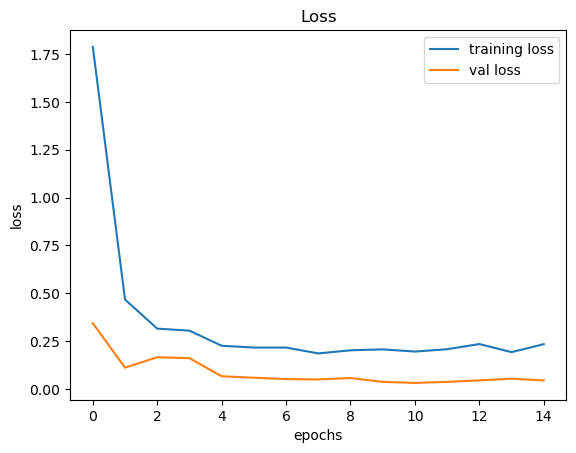

In [9]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


### Model Testing 

In [10]:
os.chdir('D:\Dataset\GTSRB - German Traffic Sign Recognition Benchmark')
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Testing accuracy on the test dataset
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

# Predict probabilities for each class using the model
probs = model.predict(X_test)

# Get the class with the highest probability for each prediction
pred = np.argmax(probs, axis=1)

# Accuracy with the test data
print(accuracy_score(labels, pred))

395/395 [==============================] - 3s 7ms/step
0.9593824228028504


### Save Model

In [11]:
model.save('traffic_classifier.keras')